In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 讀取電商資料

In [2]:
df = pd.read_excel('Online_Retail001.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
1,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom
2,536381,21934,SKULL SHOULDER BAG,10,2010-12-01 09:41:00,1.65,15311.0,United Kingdom
3,536381,47580,TEA TIME DES TEA COSY,2,2010-12-01 09:41:00,2.55,15311.0,United Kingdom
4,536384,22424,ENAMEL BREAD BIN CREAM,8,2010-12-01 09:53:00,10.95,18074.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,581538,22991,GIRAFFE WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
9996,581538,23084,RABBIT NIGHT LIGHT,2,2011-12-09 11:34:00,2.08,14446.0,United Kingdom
9997,581582,23498,CLASSIC BICYCLE CLIPS,12,2011-12-09 12:21:00,1.45,17581.0,United Kingdom
9998,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom


資料清理。

In [3]:
df = df.loc[df["Quantity"] > 0]
df.shape

(9791, 8)

In [4]:
df = df.dropna(subset=["CustomerID"])
df.shape

(7349, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
1,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom
2,536381,21934,SKULL SHOULDER BAG,10,2010-12-01 09:41:00,1.65,15311.0,United Kingdom
3,536381,47580,TEA TIME DES TEA COSY,2,2010-12-01 09:41:00,2.55,15311.0,United Kingdom
4,536384,22424,ENAMEL BREAD BIN CREAM,8,2010-12-01 09:53:00,10.95,18074.0,United Kingdom


計算 total sales。

In [6]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
1,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom,20.34
2,536381,21934,SKULL SHOULDER BAG,10,2010-12-01 09:41:00,1.65,15311.0,United Kingdom,16.50
3,536381,47580,TEA TIME DES TEA COSY,2,2010-12-01 09:41:00,2.55,15311.0,United Kingdom,5.10
4,536384,22424,ENAMEL BREAD BIN CREAM,8,2010-12-01 09:53:00,10.95,18074.0,United Kingdom,87.60


## 進行 one-hot encoding

In [7]:
encoded_df = pd.get_dummies(df['Country'])
encoded_df

,Australia,Austria,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,European Community,...,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## 切分資料集

In [8]:
X = pd.concat([df[['Quantity', 'UnitPrice']], encoded_df], axis=1)
y = df['Sales']

## 進行線性回歸

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
regr_model = LinearRegression()
regr_model.fit(X_train, y_train)

LinearRegression()

### 預測

In [11]:
y_test_preds = regr_model.predict(X_test)
y_test_preds

array([14.7543846 , 17.36700857, 22.66702808, ..., 20.65927229,
       15.08256082, 13.21928136])

### 取得模型係數

In [12]:
regr_model.coef_.round(2)

array([  0.54,   1.65,  43.21,   0.62, -10.38,  -2.74, -21.18,  -8.9 ,
       -19.61,  15.24,   5.06, -14.8 ,   0.92, -11.87, -10.54, -17.52,
       -17.84, -35.62,  63.37,   2.8 ,  61.97,  -9.17, -12.46, -13.08,
        20.73,  -2.16,  40.24, -11.04,  -9.6 , -10.66, -13.63,  -1.34])

In [13]:
intercept = regr_model.intercept_
assert isinstance(intercept, float)

print(f"Intercept: {intercept:.2f}")

Intercept: 21.22


In [14]:
import pandas as pd

coef = pd.DataFrame({'feature': X.columns, "coef": regr_model.coef_})

coef = coef.sort_values(by="coef", ascending=False)
coef

,feature,coef
18,Japan,63.371029
20,Netherlands,61.967285
2,Australia,43.206057
26,Sweden,40.240028
24,Singapore,20.727810
9,Denmark,15.235607
10,EIRE,5.056752
19,Lithuania,2.800408
1,UnitPrice,1.646132
12,Finland,0.918866


### 評估模型表現 ($R^2$)

$R^2$ 愈大愈好。另外也計算 MAE 及 MSE。

In [15]:
from sklearn.metrics import r2_score, median_absolute_error

輸入目標值和預測值來算 $R^2$。

In [16]:
r2 = r2_score(y_test, y_test_preds)
# 同 regr_model.score(X_test, y_test)

print(f"{r2 = :.2f}")

r2 = 0.46


輸入目標值和預測值來算 MAE。

In [17]:
mae = median_absolute_error(y_test, y_test_preds)
print(f"{mae = :.2f}")

mae = 7.90


輸入目標值和預測值來算 MSE。

In [18]:
mse = ((y_test - y_test_preds) ** 2).mean()

print(f"{mse = :.2f}")

mse = 1178.78


### 繪圖 test, prediction test

In [19]:
import matplotlib.pyplot as plt

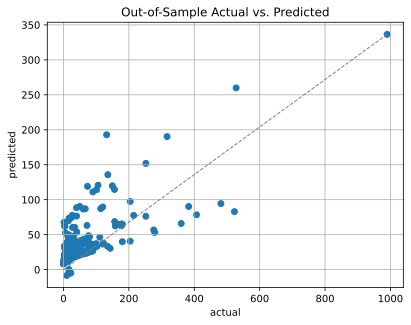

In [20]:
plt.scatter(y_test, y_test_preds)
plt.plot([0, max(y_test)], [0, max(y_test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

## 標準化後重新做線性回歸

### 標準化

In [21]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
regr_model = LinearRegression()
regr_model.fit(X_train_std, y_train)

LinearRegression()

### 預測

In [24]:
y_test_preds = regr_model.predict(X_test_std)
y_test_preds

array([14.7538429 , 17.36517102, 22.66448743, ..., 20.65759534,
       15.08215588, 13.21838635])

### 取得模型係數

In [25]:
regr_model.coef_.round(2)

array([ 2.70200000e+01,  9.36000000e+00, -1.82394655e+12, -1.48975371e+12,
       -2.41100312e+12, -7.45257378e+11, -1.05377374e+12, -1.48975371e+12,
       -1.29038429e+12, -1.17805459e+12, -5.54868386e+12, -5.27021377e+11,
       -1.39365566e+12, -5.66765469e+12, -5.94266531e+12, -7.45257378e+11,
       -9.12672493e+11, -1.66531156e+12, -1.29038429e+12, -5.27021377e+11,
       -3.23853684e+12, -2.17000537e+12, -1.57998785e+12, -2.62972179e+12,
       -9.12672493e+11, -3.15269991e+12, -1.48975371e+12, -2.92683318e+12,
       -1.17805459e+12, -5.27021377e+11, -1.25090703e+13, -5.27021377e+11])

In [26]:
intercept = regr_model.intercept_
assert isinstance(intercept, float)

print(f"Intercept: {intercept:.2f}")

Intercept: 20.86


In [27]:
import pandas as pd

coef = pd.DataFrame({'feature': X.columns, "coef": regr_model.coef_})

coef = coef.sort_values(by="coef", ascending=False)
coef

,feature,coef
0,Quantity,2.702156e+01
1,UnitPrice,9.361725e+00
19,Lithuania,-5.270214e+11
31,Unspecified,-5.270214e+11
29,United Arab Emirates,-5.270214e+11
11,European Community,-5.270214e+11
5,Brazil,-7.452574e+11
15,Iceland,-7.452574e+11
24,Singapore,-9.126725e+11
16,Israel,-9.126725e+11


### 評估模型表現 ($R^2$)

$R^2$ 愈大愈好。另外也計算 MAE 及 MSE。

In [28]:
from sklearn.metrics import r2_score, median_absolute_error

輸入目標值和預測值來算 $R^2$。

In [29]:
r2 = r2_score(y_test, y_test_preds)
# 同 regr_model.score(X_test, y_test)

print(f"{r2 = :.2f}")

r2 = 0.46


輸入目標值和預測值來算 MAE。

In [30]:
mae = median_absolute_error(y_test, y_test_preds)
print(f"{mae = :.2f}")

mae = 7.85


輸入目標值和預測值來算 MSE。

In [31]:
mse = ((y_test - y_test_preds) ** 2).mean()

print(f"{mse = :.2f}")

mse = 1178.90


### 繪圖 test, prediction test

In [32]:
import matplotlib.pyplot as plt

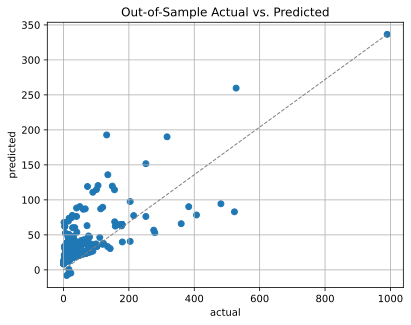

In [33]:
plt.scatter(y_test, y_test_preds)
plt.plot([0, max(y_test)], [0, max(y_test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()